In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 4]

import pickle
import pandas
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


In [11]:
data_dict.items()[0]


('METTS MARK',
 {'bonus': 600000,
  'deferral_payments': 'NaN',
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'mark.metts@enron.com',
  'exercised_stock_options': 'NaN',
  'expenses': 94299,
  'from_messages': 29,
  'from_poi_to_this_person': 38,
  'from_this_person_to_poi': 1,
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 1740,
  'poi': False,
  'restricted_stock': 585062,
  'restricted_stock_deferred': 'NaN',
  'salary': 365788,
  'shared_receipt_with_poi': 702,
  'to_messages': 807,
  'total_payments': 1061827,
  'total_stock_value': 585062})

In [12]:
data_dict.keys()

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

In [13]:
expenses = map(lambda (x, y): (x,y['expenses']),data_dict.items())
expenses.sort(cmp = lambda (_1,expense1),(_2,expense2): cmp(expense1,expense2))

In [14]:
expenses

[('MENDELSOHN JOHN', 148),
 ('HAUG DAVID L', 475),
 ('BUCHANAN HAROLD G', 600),
 ('BLAKE JR. NORMAN P', 1279),
 ('WINOKUR JR. HERBERT S', 1413),
 ('MEYER JEROME J', 2151),
 ('DIETRICH JANET R', 3475),
 ('BADUM JAMES P', 3486),
 ('HUMPHREY GENE E', 4994),
 ('KITCHEN LOUISE', 5774),
 ('MARTIN AMANDA K', 8211),
 ('REYNOLDS LAWRENCE', 8409),
 ('BUTTS ROBERT H', 9410),
 ('JACKSON CHARLENE R', 10181),
 ('BAXTER JOHN C', 11200),
 ('BERBERIAN DAVID', 11892),
 ('ALLEN PHILLIP K', 13868),
 ('REDMOND BRIAN L', 14689),
 ('COLWELL WESLEY', 16514),
 ('STABLER FRANK', 16514),
 ('BELDEN TIMOTHY N', 17355),
 ('OVERDYKE JR JERE C', 18834),
 ('ECHOLS JOHN B', 21530),
 ('CUMBERLAND MICHAEL S', 22344),
 ('SHELBY REX', 22884),
 ('FITZGERALD JAY L', 23870),
 ('DURAN WILLIAM D', 25785),
 ('COX DAVID', 27861),
 ('PEREIRA PAULO V. FERRAZ', 27942),
 ('IZZO LAWRENCE L', 28093),
 ('DODSON KEITH', 28164),
 ('SKILLING JEFFREY K', 29336),
 ('CAUSEY RICHARD A', 30674),
 ('PICKERING MARK R', 31653),
 ('PAI LOU L', 3204

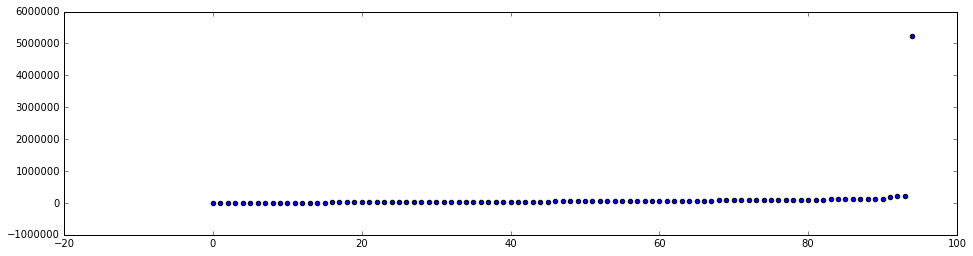

In [90]:
(people, values) = zip(*expenses)
plt.scatter(range(len(values)),values)

There is an outlier: *TOTAL*. This certainly a column for totals. Let's remove it before proceeding.

In [16]:
del data_dict['TOTAL']

In [17]:
df = pandas.DataFrame.from_dict(data_dict, orient='index')

In [18]:
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [19]:
df['expenses'] = df['expenses'].astype('float')
df['salary'] = df['salary'].astype('float')
df['from_this_person_to_poi'] = df['from_this_person_to_poi'].astype('float')
df['from_poi_to_this_person'] = df['from_poi_to_this_person'].astype('float')

# Expenses Data Distribution

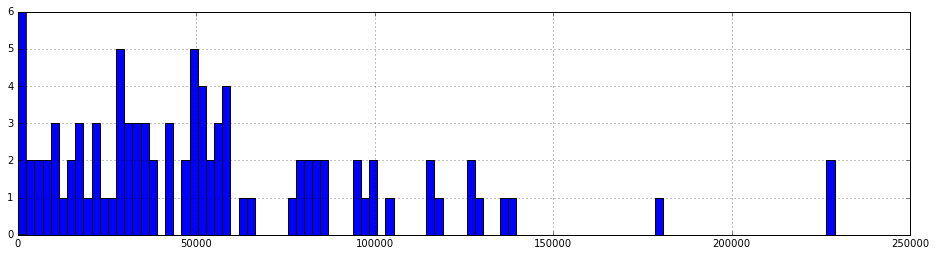

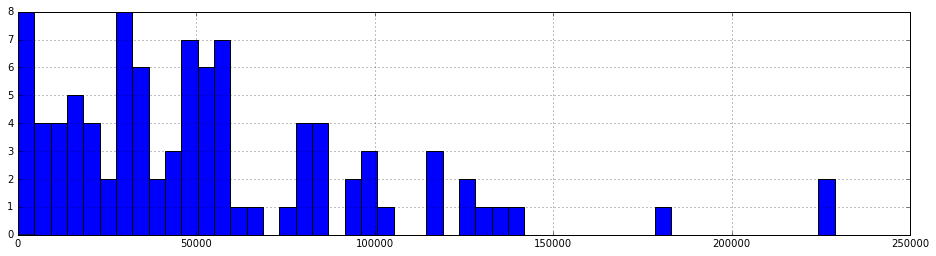

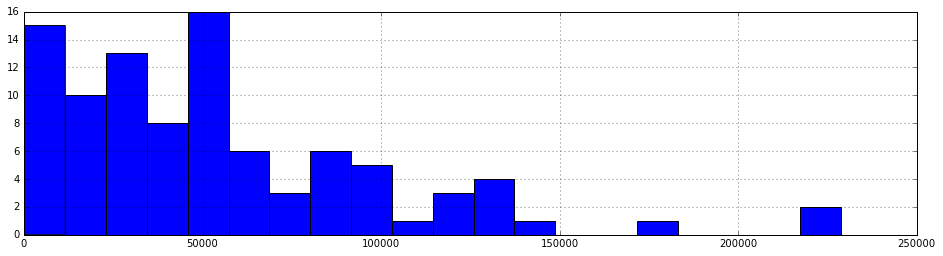

In [20]:
df['expenses'] = df['expenses'].astype('float')
df['expenses'].hist(bins=100)
plt.figure()
df['expenses'].hist(bins=50)
plt.figure()
df['expenses'].hist(bins=20)

We can see that there are **three** employees spend considerably more than others.

In [21]:
df[df['expenses']>150000]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
MCCLELLAN GEORGE,263413,1744,NaN,1318763,506765,900000,441096,1469,NaN,947861,...,NaN,49,51587,0,False,NaN,-125000,NaN,george.mcclellan@enron.com,52
SHANKMAN JEFFREY A,304110,3221,NaN,3038702,1441898,2000000,630137,1730,NaN,2072035,...,NaN,2681,1191,83,False,NaN,NaN,554422,jeffrey.shankman@enron.com,94
URQUHART JOHN A,NaN,NaN,NaN,228656,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,36666,-36666,NaN,NaN,NaN


# Salary Data Distribution

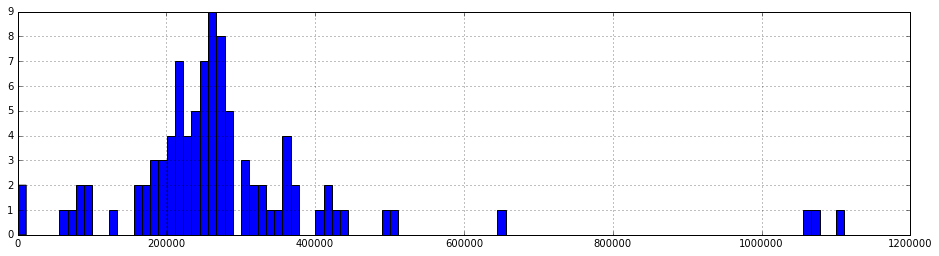

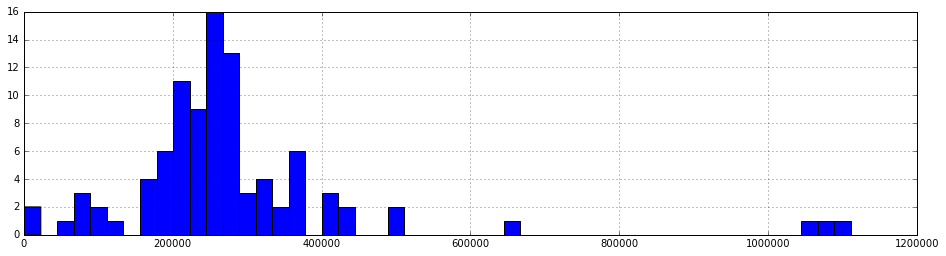

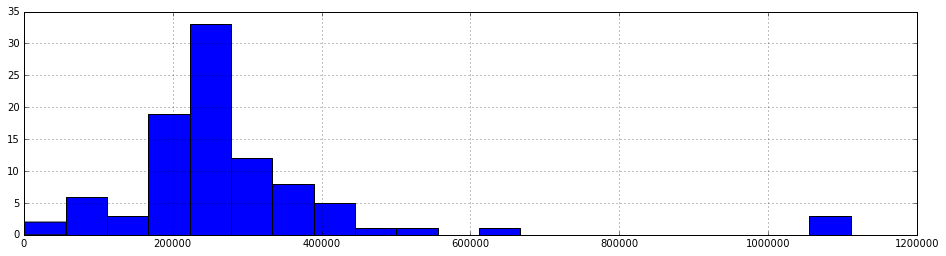

In [22]:
df['salary'] = df['salary'].astype('float')
df['salary'].hist(bins=100)
plt.figure()
df['salary'].hist(bins=50)
plt.figure()
df['salary'].hist(bins=20)

There are **four** people with a considerably higher salary than other employees (>\$600K).

In [23]:
df[df['salary']>600000]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
FREVERT MARK A,1060932,3275,6426990,17252530,10433518,2000000,4188667,2979,NaN,14622185,...,2000000,21,7427621,6,False,NaN,-3367011,1617011,mark.frevert@enron.com,242
LAY KENNETH L,1072321,4273,202911,103559793,34348384,7000000,14761694,2411,NaN,49110078,...,81525000,36,10359729,16,True,NaN,-300000,3600000,kenneth.lay@enron.com,123
PICKERING MARK R,655037,898,NaN,1386690,28798,300000,NaN,728,NaN,28798,...,400000,67,NaN,0,False,NaN,NaN,NaN,mark.pickering@enron.com,7
SKILLING JEFFREY K,1111258,3627,NaN,8682716,19250000,5600000,6843672,2042,NaN,26093672,...,NaN,108,22122,30,True,NaN,NaN,1920000,jeff.skilling@enron.com,88


Top salary employees are not the same as top expenses employees.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ee66310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e6feed0>]], dtype=object)

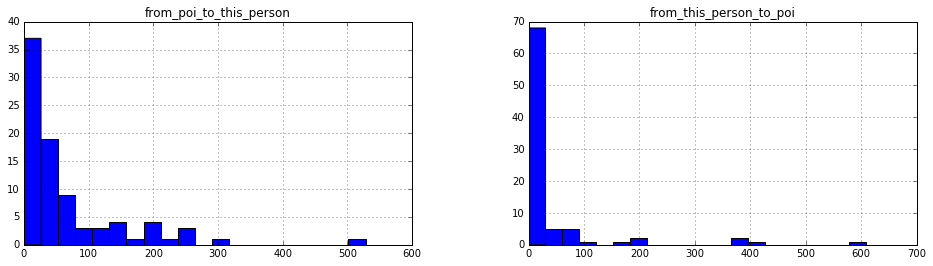

In [25]:
df[['from_this_person_to_poi','from_poi_to_this_person']].hist(bins=20)

In [26]:
df[df['from_this_person_to_poi']>280]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,126027,2639,NaN,126027,...,NaN,4343,566,386,False,NaN,NaN,NaN,sally.beck@enron.com,144
DELAINEY DAVID W,365163,3093,NaN,4747979,2291113,3000000,1323148,2097,NaN,3614261,...,NaN,3069,1661,609,True,NaN,NaN,1294981,david.delainey@enron.com,66
KEAN STEVEN J,404338,12754,NaN,1747522,2022048,1000000,4131594,3639,NaN,6153642,...,NaN,6759,1231,387,False,NaN,NaN,300000,steven.kean@enron.com,140
LAVORATO JOHN J,339288,7259,NaN,10425757,4158995,8000000,1008149,3962,NaN,5167144,...,NaN,2585,1552,411,False,NaN,NaN,2035380,john.lavorato@enron.com,528


In [27]:
df[df['from_poi_to_this_person']>300]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
DIETRICH JANET R,250100,2572,NaN,1410464,1550019,600000,315068,1902,NaN,1865087,...,NaN,63,473,14,False,NaN,NaN,556416,janet.dietrich@enron.com,305
LAVORATO JOHN J,339288,7259,NaN,10425757,4158995,8000000,1008149,3962,NaN,5167144,...,NaN,2585,1552,411,False,NaN,NaN,2035380,john.lavorato@enron.com,528


/Users/luiscruz/dev/udacity_data_analyst/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


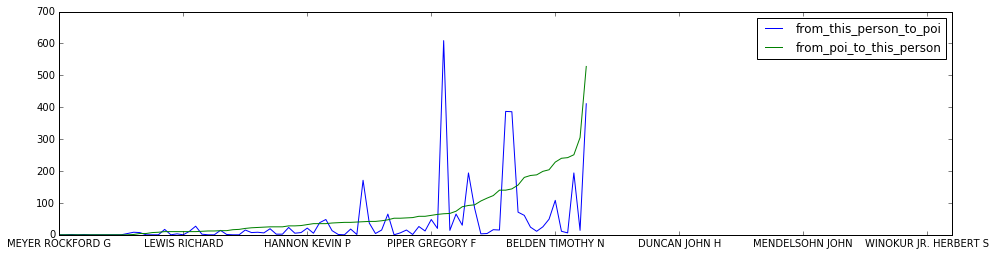

In [28]:
df[['from_this_person_to_poi','from_poi_to_this_person']].sort('from_poi_to_this_person').plot()

High 'from_this_person_to_poi' does not necessarily mean high 'from_poi_to_this_person', so both variables should evaluated.

In [33]:
df['bonus'] = df['bonus'].astype('float')

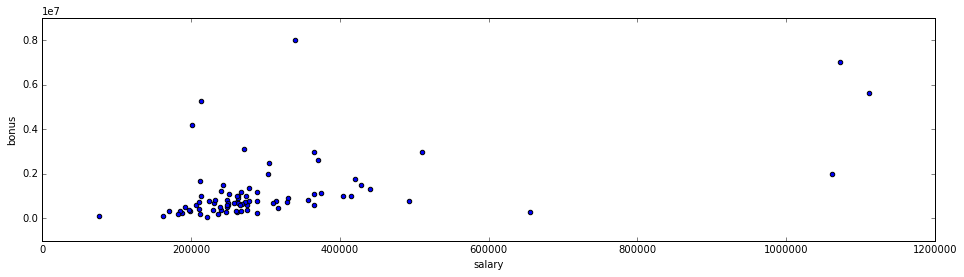

In [37]:
df[['salary','bonus']].plot(kind='scatter', x='salary', y='bonus')

Perhaps makes sense combining salary with bonus. A new feature could be salary+bonus

In [43]:
df['salary+bonus']=df['salary']+df['bonus']

In [44]:
list(df.columns)

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person',
 'salary_bonus',
 'salary+bonus']

In [53]:
1+np.nan

nan

In [76]:
for _,obj in data_dict.items():
    salary_bonus_ratio = np.float(obj['bonus'])/np.float(obj['salary'])
    if np.isnan(salary_bonus_ratio):
        salary_bonus_ratio = -1
    obj['salary_bonus_ratio'] = salary_bonus_ratio

In [77]:
data_dict.items()

[('METTS MARK',
  {'bonus': 600000,
   'deferral_payments': 'NaN',
   'deferred_income': 'NaN',
   'director_fees': 'NaN',
   'email_address': 'mark.metts@enron.com',
   'exercised_stock_options': 'NaN',
   'expenses': 94299,
   'from_messages': 29,
   'from_poi_to_this_person': 38,
   'from_this_person_to_poi': 1,
   'loan_advances': 'NaN',
   'long_term_incentive': 'NaN',
   'other': 1740,
   'poi': False,
   'restricted_stock': 585062,
   'restricted_stock_deferred': 'NaN',
   'salary': 365788,
   'salary+bonus': 965788.0,
   'salary_bonus_ratio': 1.6402943781644013,
   'shared_receipt_with_poi': 702,
   'to_messages': 807,
   'total_payments': 1061827,
   'total_stock_value': 585062}),
 ('BAXTER JOHN C',
  {'bonus': 1200000,
   'deferral_payments': 1295738,
   'deferred_income': -1386055,
   'director_fees': 'NaN',
   'email_address': 'NaN',
   'exercised_stock_options': 6680544,
   'expenses': 11200,
   'from_messages': 'NaN',
   'from_poi_to_this_person': 'NaN',
   'from_this_per

## Feature Selection

In [84]:
import sys
sys.path.append("./tools/")
from feature_format import featureFormat, targetFeatureSplit
import numpy as np
features_all = [
    'poi',
    'salary',
    'to_messages',
    'deferral_payments',
    'total_payments',
    'exercised_stock_options',
    'bonus',
    'restricted_stock',
    'shared_receipt_with_poi',
    'restricted_stock_deferred',
    'total_stock_value',
    'expenses',
    'loan_advances',
    'from_messages',
    'other',
    'from_this_person_to_poi',
    'director_fees',
    'deferred_income',
    'long_term_incentive',
    # 'email_address',
    'from_poi_to_this_person',
    'salary_bonus_ratio',
]
features_list=features_all



data = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

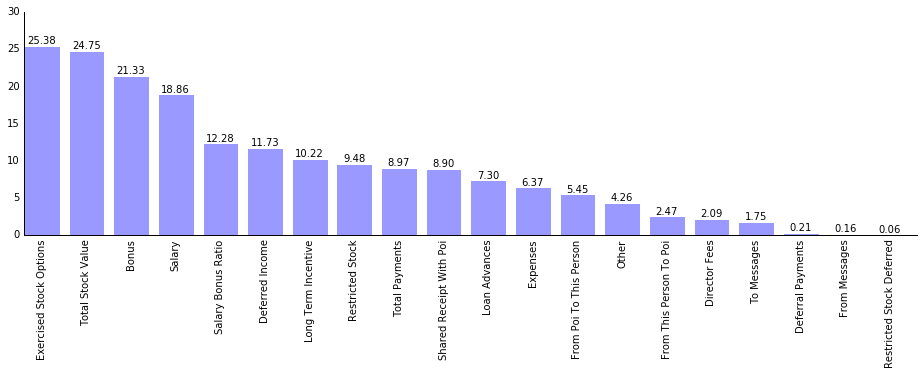

In [85]:
from sklearn.feature_selection import SelectKBest, f_classif


# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(features, labels)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)
scores= selector.scores_
predictors = features_list[1:]
sort_indices = np.argsort(scores)[::-1]

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
X=np.arange(len(predictors))
Y=scores[sort_indices]
X_labels = map(lambda x: x.replace("_"," ").title(),np.array(predictors)[sort_indices])
ax = plt.subplot(111)
ax.bar(X, Y,edgecolor='white',facecolor='#9999ff')
plt.xticks(X+0.4, X_labels, rotation='vertical')
for x,y in zip(X,Y):
    ax.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
pass
plt.tick_params(bottom='off',top='off', right='off', left='off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [86]:
zip(np.array(predictors)[sort_indices],scores[sort_indices])

[('exercised_stock_options', 25.380105299760199),
 ('total_stock_value', 24.752523020258508),
 ('bonus', 21.327890413979102),
 ('salary', 18.861795316466416),
 ('salary_bonus_ratio', 12.278007938540965),
 ('deferred_income', 11.732698076065354),
 ('long_term_incentive', 10.222904205832778),
 ('restricted_stock', 9.4807432034789336),
 ('total_payments', 8.9678193476776205),
 ('shared_receipt_with_poi', 8.9038215571655712),
 ('loan_advances', 7.3014066515360359),
 ('expenses', 6.3746144901977475),
 ('from_poi_to_this_person', 5.4466874833253529),
 ('other', 4.2635766381444693),
 ('from_this_person_to_poi', 2.470521222656084),
 ('director_fees', 2.0893098994318806),
 ('to_messages', 1.7516942790340737),
 ('deferral_payments', 0.20970584227026345),
 ('from_messages', 0.1587702392129193),
 ('restricted_stock_deferred', 0.064477028038728595)]

In [87]:
list(np.array(predictors)[sort_indices])

['exercised_stock_options',
 'total_stock_value',
 'bonus',
 'salary',
 'salary_bonus_ratio',
 'deferred_income',
 'long_term_incentive',
 'restricted_stock',
 'total_payments',
 'shared_receipt_with_poi',
 'loan_advances',
 'expenses',
 'from_poi_to_this_person',
 'other',
 'from_this_person_to_poi',
 'director_fees',
 'to_messages',
 'deferral_payments',
 'from_messages',
 'restricted_stock_deferred']